In [2]:
import cv2 as cv
import numpy as np
import sys
import matplotlib.pyplot as plt
from skimage.segmentation import clear_border
from tensorflow import keras
import functions.sudoku as sk
import functions.solver as solver

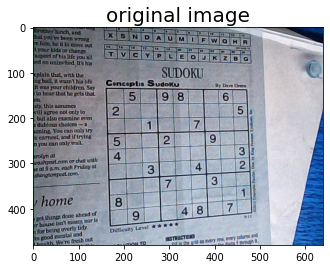

In [4]:
img = cv.imread("figures/1.jpg") # alternatively add flags = 0, which turns image into grayscale
plt.imshow(img)   
_=plt.title("original image", size=20)

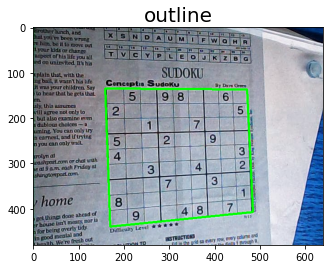

In [5]:
warped = sk.find_sudoku(img, kernel_size=7, canny_threshold=100, printer="outline")

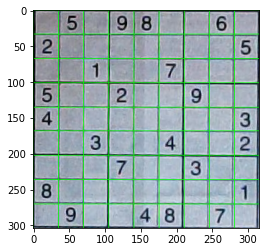

In [6]:
grid = warped.copy()
cell_height = warped.shape[0] / 9
cell_width = warped.shape[1] / 9
for i in range(10):
    cv.line(grid,(int(i * cell_width),-1000),(int(i * cell_width),1000),(0,255,0),1)
for i in range(10):
    cv.line(grid,(-1000, int(i * cell_height)),(1000, int(i * cell_height)),(0,255,0),1)
_=plt.imshow(grid)

In [12]:
model = keras.models.load_model("models/third_model")
grid, _, _ =sk.fill_grid(warped, model)

In [16]:
solver.visualize(grid)

- - - - - - - - - - - - - 
| 0 5 0 | 9 8 0 | 0 6 0 |
| 2 0 0 | 0 0 0 | 0 0 5 |
| 0 0 1 | 0 0 7 | 0 0 0 |
- - - - - - - - - - - - - 
| 5 0 0 | 2 0 0 | 9 0 0 |
| 4 0 0 | 0 0 0 | 0 0 3 |
| 0 0 3 | 0 0 4 | 0 0 2 |
- - - - - - - - - - - - - 
| 0 0 0 | 7 0 0 | 3 0 0 |
| 8 0 0 | 0 0 0 | 0 0 1 |
| 0 9 0 | 0 4 8 | 0 7 0 |
- - - - - - - - - - - - - 


In [18]:
solver.visualize(solver.solve(grid))

It worked:
- - - - - - - - - - - - - 
| 3 5 4 | 9 8 1 | 2 6 7 |
| 2 7 8 | 4 3 6 | 1 9 5 |
| 9 6 1 | 5 2 7 | 8 3 4 |
- - - - - - - - - - - - - 
| 5 1 6 | 2 7 3 | 9 4 8 |
| 4 2 9 | 8 6 5 | 7 1 3 |
| 7 8 3 | 1 9 4 | 6 5 2 |
- - - - - - - - - - - - - 
| 6 4 5 | 7 1 2 | 3 8 9 |
| 8 3 7 | 6 5 9 | 4 2 1 |
| 1 9 2 | 3 4 8 | 5 7 6 |
- - - - - - - - - - - - - 
